## Baryon asymmetry

https://arxiv.org/pdf/1908.04818.pdf

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [3]:
#Read old file
xd = pd.read_csv('nbs-scan.csv')
del xd['Unnamed: 0']

xd.shape

(687457, 10)

cleaning NAN and negative values in $\Delta n_B$

In [4]:
xd = xd[np.abs(xd.Deltan_B) >0.]

xd = xd.reset_index()
del[xd['index']]

In [5]:
xd.shape

(659627, 10)

In [6]:
#Read old file
yd = pd.read_csv('../DarkBariogenesis/good-points.csv')
#yd = pd.read_csv('../DarkBariogenesis/good-points-under-panda.csv')
del yd['Unnamed: 0']

yd.shape

(1350, 105)

$$ s \approx 2\pi^2 g^{*}T_c^3/45  $$

$$ g^{*}\approx g_B +(7/8)g_F \approx \mathcal{O}(100) $$

$$ \eta_B = \dfrac{\Delta n_B}{s} \approx 0.9 \times 10^{-10}$$

Experimental value: $[\eta-\Delta\eta,\eta+\Delta\eta]$

In [7]:
eta_exp = 0.9*1e-10
eta_min = (5.8/7.04)*1e-10
eta_max = (6.5/7.04)*1e-10
eta_med = (eta_min+eta_max)/2.

delta_eta = eta_max-eta_med

print(eta_min,eta_med, eta_max, delta_eta)

8.238636363636364e-11 8.735795454545455e-11 9.232954545454546e-11 4.971590909090916e-12


### entropy $s$ value

In [8]:
Tc = 246.
gx = 100.
entropy = (2.*np.pi**2*gx*(Tc**3)/45.)
print(entropy)

653014084.7303805


### $\eta_B=\dfrac{\Delta n_B}{s}$ value

In [9]:
xd['etaB'] = np.abs(xd.Deltan_B)/entropy

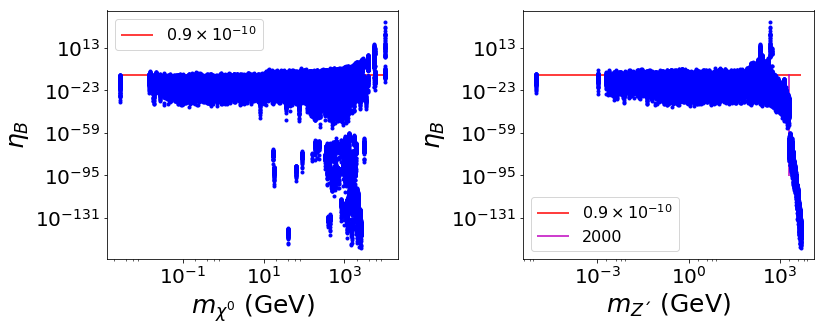

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(xd.mot,xd.etaB,'b.',label=r'')

plt.hlines(0.9e-10,xd.mot.min(),xd.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(1e-39,1e-6)

plt.subplot(122)
plt.loglog(xd.MZp,xd.etaB,'b.',label=r'')

plt.hlines(0.9e-10,xd.MZp.min(),xd.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.vlines(2000.,1e-96,1e-9,'m',label=r'2000')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(1e-39,1e-6)

plt.tight_layout()
plt.show()

Points for Walter

In [34]:
xd.columns

Index(['MZp', 'gp', 'Deltan_B', 'mot', 'tht', 'lamt', 'sot', 'Tnt', 'Lwt',
       'vwt', 'etaB'],
      dtype='object')

In [45]:
wd = xd[xd.Tnt<200.]
wd = wd.reset_index()
del[wd['index']]

In [69]:
print(xd.shape,wd.shape,yd.shape)

(659627, 11) (175247, 11) (1350, 105)


yd is the Dataframe with all the good points (relic density and neutrinos). zd are the points with good nB. We will export a file with the points with at nB = 0 to run again in the cluster.

In [88]:
# It 
xx=[]

for j in range(0,wd.shape[0]):#run wd: it is the full Baryogenesis file
    
    MZp = wd.MZp[j] 

    for i in range(0,yd.shape[0]):#run yd: it is the DM and neutrino file
        
        #print(j,i)
        if eval(format(MZp,'.6f')) == eval(format(yd.MZp[i],'.6f')):
            #print("found",i)

            MZp= wd.MZp[j]
            gp= wd.gp[j]
            mot= wd.mot[j]
            tht= wd.tht[j]
            lamt= wd.lamt[j]
            sot= wd.sot[j]
            Tnt= wd.Tnt[j]
            Lwt= wd.Lwt[j]
            vwt= wd.vwt[j]
            Deltan_B= wd.Deltan_B[j]
            etaB= wd.etaB[j]
            
            Lambda2 = yd.Lambda2[i]
            Lambda3 = yd.Lambda3[i]
            Lambda4 = yd.Lambda4[i]
            Lambda5 = yd.Lambda5[i]
            muj = yd.muj[i]
            vx = yd.vx[i]
            Fi11 = yd.Fi11[i]
            Fi22 = yd.Fi22[i]
            Fj11 = yd.Fj11[i]
            Fj22 = yd.Fj22[i]
            L611 = yd.L611[i]
            L612 = yd.L612[i]
            L621 = yd.L621[i]
            L622 = yd.L622[i]
            L711 = yd.L711[i]
            L712 = yd.L712[i]
            L721 = yd.L721[i]
            L722 = yd.L722[i]
            M111 = yd.M111[i]
            M122 = yd.M122[i]
            M211 = yd.M211[i]
            M222 = yd.M222[i]
            mh1 = yd.mh1[i]
            mh2 = yd.mh2[i]
            mH2 = yd.mH2[i]
            mH3 = yd.mH3[i]
            mH4 = yd.mH4[i]
            mH5 = yd.mH5[i]
            mss = yd.mss[i]
            
            break

    xx.append([MZp,gp,mot,tht,lamt,sot,Tnt,Lwt,vwt,etaB,Deltan_B,Lambda2,Lambda3,\
               Lambda4,Lambda5,muj,vx,Fi11,Fi22,Fj11,Fj22,Fj22,L611,L612,L621,\
               L622,L711,L712,L721,L722,M111,M122,M211,M222,mh1,mh2,mH2,mH3,mH4,\
               mH5,mss])

xx=np.asarray(xx)

xdwalter=pd.DataFrame(xx,columns=['MZp','gp','mot','tht','lamt','sot','Tnt',\
                                  'Lwt','vwt','etaB','Deltan_B','Lambda2','Lambda3',\
                                  'Lambda4','Lambda5','muj','vx','Fi11','Fi22','Fj11',\
                                  'Fj22','Fj22','L611','L612','L621','L622','L711',\
                                  'L712','L721','L722','M111','M122','M211','M222',\
                                  'mh1','mh2','mH2','mH3','mH4','mH5','mss'])  

In [90]:
xdwalter[:3]

,MZp,gp,mot,tht,lamt,sot,Tnt,Lwt,vwt,etaB,...,M122,M211,M222,mh1,mh2,mH2,mH3,mH4,mH5,mss
0,331.683687,0.106056,409.149868,-0.288574,0.026995,438.998218,178.212620,0.012599,0.450061,1.085805e-13,...,1.756324e+07,2.219142e+06,2.557399e+07,122.406796,412.783266,1489.68953,3780.59827,4190.85330,5057.07392,5784.06086
1,0.098557,0.000004,0.045890,0.641904,0.015294,408.580957,132.188652,0.026479,0.115661,7.628943e-20,...,2.146871e+07,1.253448e+07,1.295959e+06,124.861597,755.509078,1138.52821,3518.18567,3540.58702,4633.45327,2037.23415
2,0.654089,0.000018,0.312582,-0.742641,0.075269,200.946907,185.336996,0.008330,0.071577,3.522756e-16,...,1.463598e+07,1.601445e+06,3.313719e+06,124.861947,2360.242770,1265.48664,1820.41480,2721.69917,3825.72734,3356.91809


In [89]:
xdwalter.shape

(175247, 41)

In [92]:
#export
#xdwalter.to_csv('../DarkBariogenesis/baryogenesis-file.csv')

In [10]:
zd=xd[np.logical_and(xd.etaB > eta_med-(10.*delta_eta) , xd.etaB < eta_med+(10.*delta_eta))]

zd = zd.reset_index()
del[zd['index']]

#export
#zd.to_csv('../DarkBariogenesis/etaB.csv')

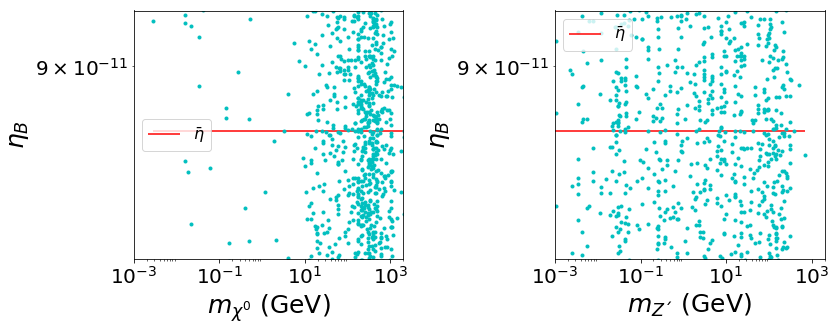

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(zd.mot, zd.etaB,'c.',label=r'')

plt.hlines(eta_med,zd.mot.min(),zd.mot.max(),'r',label=r'$\bar{\eta}$')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.subplot(122)
plt.loglog(zd.MZp, zd.etaB,'c.',label=r'')

plt.hlines(eta_med,zd.MZp.min(),zd.MZp.max(),'r',label=r'$\bar{\eta}$')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.tight_layout()
plt.show()

### Filtering data

yd is the Dataframe with all the good points (relic density and neutrinos). zd are the points with good nB. We will export a file with the points with at nB = 0 to run again in the cluster.

In [76]:
# It takes the good etaB value at the moment, otherwise it put etaB=0
xx=[]

for j in range(0,yd.shape[0]):#good DataFrame
    
    MZp = yd.MZp[j] #element of the big dataframe

    for i in range(0,zd.shape[0]):#run zd with good nB

        if eval(format(MZp,'.6f')) == eval(format(zd.MZp[i],'.6f')):
            #print("found",i)

            etaB = zd.etaB[i]
            lamt = zd.lamt[i]
            tht = zd.tht[i]

            break

        else:
            etaB = 0.
            lamt = 0.
            tht = 0.

    xx.append([etaB,lamt,tht])

xx=np.asarray(xx)

xetaB=pd.DataFrame(xx,columns=['etaB','lamt','tht'])  

In [78]:
print(yd.shape,gp.shape,zd.shape,xetaB.shape)

(1350, 105) (27873, 11) (8187, 11) (1350, 3)


(616, 105) (27873, 11) (659, 11) (616, 3)


In [79]:
#add to the Dataframe
yd['etaB'] = xetaB['etaB']
yd['lamt'] = xetaB['lamt']
yd['tht'] = xetaB['tht']

kk = yd[np.logical_and(yd.etaB == 0, yd.MZp < 1.3e+3)]
#export points to run again
kk = kk.reset_index()
del[kk['index']]
kk.to_csv('good-points.csv')

kkk = yd[yd.etaB != 0.]#good etaB
kkk = kkk.reset_index()
del[kkk['index']]
#kkk.to_csv('../DarkBariogenesis/etaB.csv')
kkk.to_csv('../DarkBariogenesis/etaB_10.csv')

print(kk.shape, kkk.shape)

(576, 108) (585, 108)


(478, 108) (50, 108)


kkk has lest data because there are some repeated DM masses

## Analysis for YA2 vs lamt

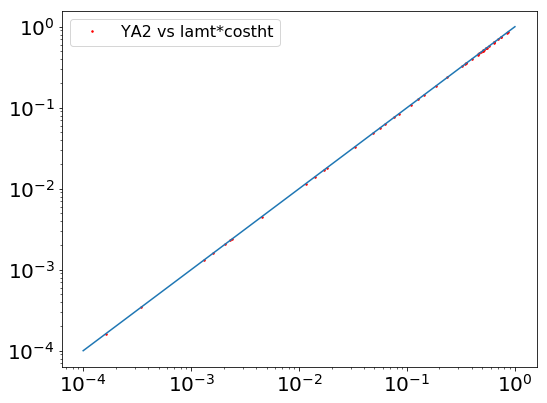

In [18]:
plt.figure(figsize=(8,6))

b = np.linspace(1e-4,1,10)

plt.loglog(kkk.YA2, kkk['lamt']*np.cos(kkk.tht), color='red', marker='.',ms=3,linestyle='',label='YA2 vs lamt*costht')
plt.plot(b,b)

plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
plt.show()

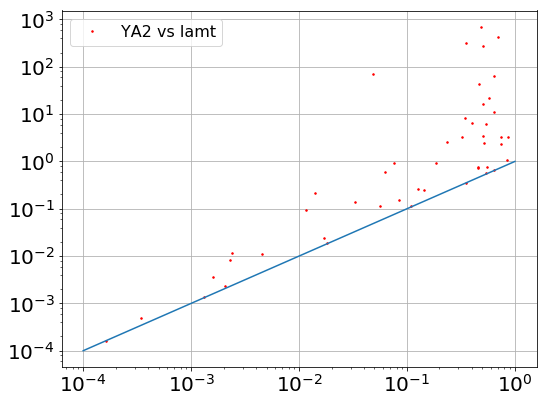

In [19]:
plt.figure(figsize=(8,6))

b = np.linspace(1e-4,1,10)

plt.loglog(kkk.YA2, kkk['lamt'], color='red', marker='.',ms=3,linestyle='',label='YA2 vs lamt')
plt.plot(b,b)

plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

In [83]:
kkk = yd[np.logical_and(yd.etaB != 0.,yd.lamt < 4*np.pi)]#good etaB
kkk = kkk.reset_index()
del[kkk['index']]
kkk.to_csv('../DarkBariogenesis/etaB.csv')

print( kkk.shape)

(252, 108)


## Randon parameters searching

KeyError: 'Deltan_B'

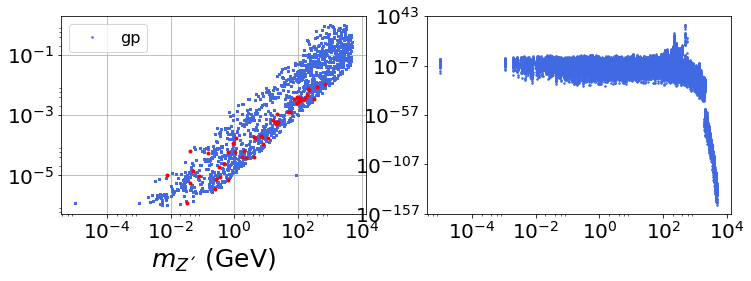

In [28]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.MZp, xd['gp'], color='royalblue', marker='.',ms=3,linestyle='',label='gp')
plt.loglog(zd.MZp, zd['g1p'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.MZp, xd['Deltan_B'], color='royalblue', marker='.',ms=3,linestyle='',label='DeltaBn')
plt.loglog(zd.MZp, zd['Deltan_B'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.semilogx(xd.MZp, xd['tht'], color='royalblue', marker='.',ms=3,linestyle='',label='tht')
plt.semilogx(zd.MZp, zd['tht'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.MZp, xd.lamt, color='royalblue', marker='.',ms=3,linestyle='',label=r'$\lambda_c$')
plt.loglog(zd.MZp, zd['lamt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

KeyError: 'sot'

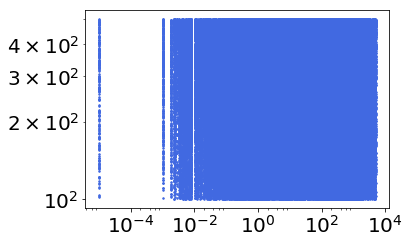

In [29]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.MZp, xd['sot'], color='royalblue', marker='.',ms=3,linestyle='',label='sot')
plt.loglog(zd.MZp, zd['sot'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.MZp, xd['Tnt'], color='royalblue', marker='.',ms=3,linestyle='',label='Tnt')
plt.loglog(zd.MZp, zd['Tnt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.MZp, xd['Lwt'], color='royalblue', marker='.',ms=3,linestyle='',label='Lwt')
plt.loglog(zd.MZp, zd['Lwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.MZp, xd['vwt'], color='royalblue', marker='.',ms=3,linestyle='',label='vwt')
plt.loglog(zd.MZp, zd['vwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mot, xd['gp'], color='royalblue', marker='.',ms=3,linestyle='',label='gp')
plt.loglog(zd.mot, zd['gp'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mot, xd['Deltan_B'], color='royalblue', marker='.',ms=3,linestyle='',label='DeltaBn')
plt.loglog(zd.mot, zd['Deltan_B'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.semilogx(xd.mot, xd['tht'], color='royalblue', marker='.',ms=3,linestyle='',label='tht')
plt.semilogx(zd.mot, zd['tht'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.mot, xd['lamt'], color='royalblue', marker='.',ms=3,linestyle='',label='lamt')
plt.loglog(zd.mot, zd['lamt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mot, xd['sot'], color='royalblue', marker='.',ms=3,linestyle='',label='sot')
plt.loglog(zd.mot, zd['sot'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mot, xd['Tnt'], color='royalblue', marker='.',ms=3,linestyle='',label='Tnt')
plt.loglog(zd.mot, zd['Tnt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.mot, xd['Lwt'], color='royalblue', marker='.',ms=3,linestyle='',label='Lwt')
plt.loglog(zd.mot, zd['Lwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.mot, xd['vwt'], color='royalblue', marker='.',ms=3,linestyle='',label='vwt')
plt.loglog(zd.mot, zd['vwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.semilogy( zd['sot'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='sot')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.semilogy(zd['Tnt'],zd.etaB,  color='red', marker='.',ms=3,linestyle='',label='Tnt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog( zd['Lwt'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='Lwt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog( zd['vwt'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='vwt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(zd['gp'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='gp')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(zd['Deltan_B'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='DeltaBn')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.plot(zd['tht'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='tht')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(zd['lamt'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='lamt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()